# 📊 Projet : Analyse et Prédiction d'une Campagne Marketing Bancaire

# 🛠️ Étape 1 : Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📥 Étape 2 : Chargement des données

In [6]:
df = pd.read_csv('C:/Users/HP/Desktop/BANK/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# 🧼 Étape 3 : Nettoyage des données

In [7]:
print("Forme initiale:", df.shape)

Forme initiale: (11162, 17)


In [8]:
print("Valeurs manquantes:\n", df.isnull().sum())

Valeurs manquantes:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [9]:
print("Colonnes:\n", df.columns)

Colonnes:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


# Vérifions les doublons

In [10]:
df.drop_duplicates(inplace=True)

# Encodage des variables catégorielles

In [11]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 🔍 Étape 4 : Analyse exploratoire

# ➤ Visualisation de la répartition de la variable cible 'deposit'

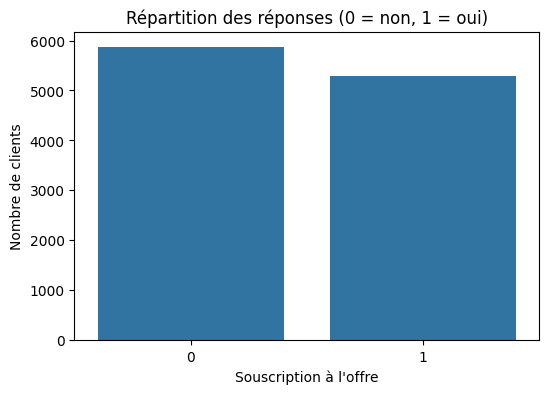

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='deposit', data=df)
plt.title("Répartition des réponses (0 = non, 1 = oui)")
plt.xlabel("Souscription à l'offre")
plt.ylabel("Nombre de clients")
plt.show()

# ➤ Distribution de l'âge par rapport à la souscription

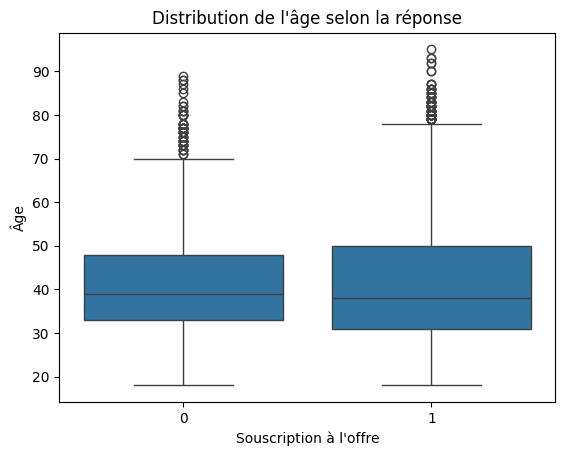

In [16]:
sns.boxplot(x='deposit', y='age', data=df)
plt.title("Distribution de l'âge selon la réponse")
plt.xlabel("Souscription à l'offre")
plt.ylabel("Âge")
plt.show()


# 📊 Étape 5 : Visualisation

# ➤ Répartition des clients selon leur métier

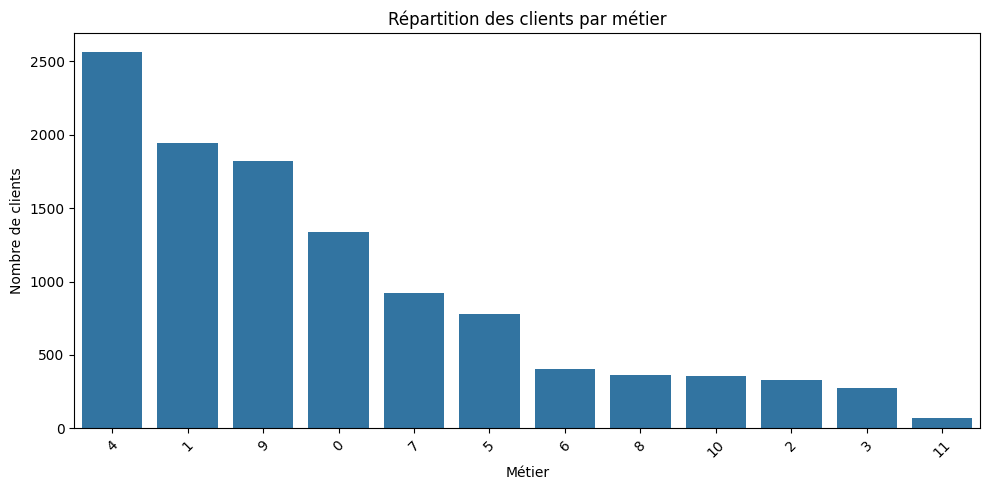

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title("Répartition des clients par métier")
plt.xlabel("Métier")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ➤ Taux de souscription par canal de contact

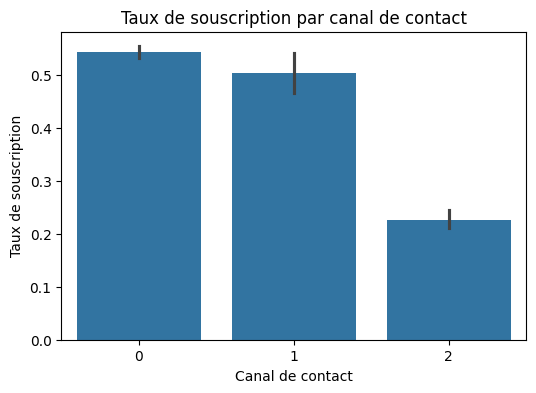

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='contact', y='deposit', data=df, estimator=lambda x: np.mean(x==1))
plt.title("Taux de souscription par canal de contact")
plt.xlabel("Canal de contact")
plt.ylabel("Taux de souscription")
plt.show()

# ➤ Taux de souscription par mois

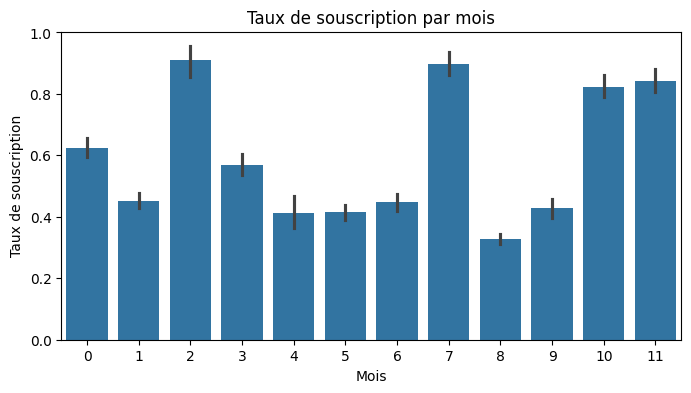

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x='month', y='deposit', data=df, estimator=lambda x: np.mean(x==1), order=sorted(df['month'].unique()))
plt.title("Taux de souscription par mois")
plt.xlabel("Mois")
plt.ylabel("Taux de souscription")
plt.show()

# ➤ Corrélations entre les variables numériques

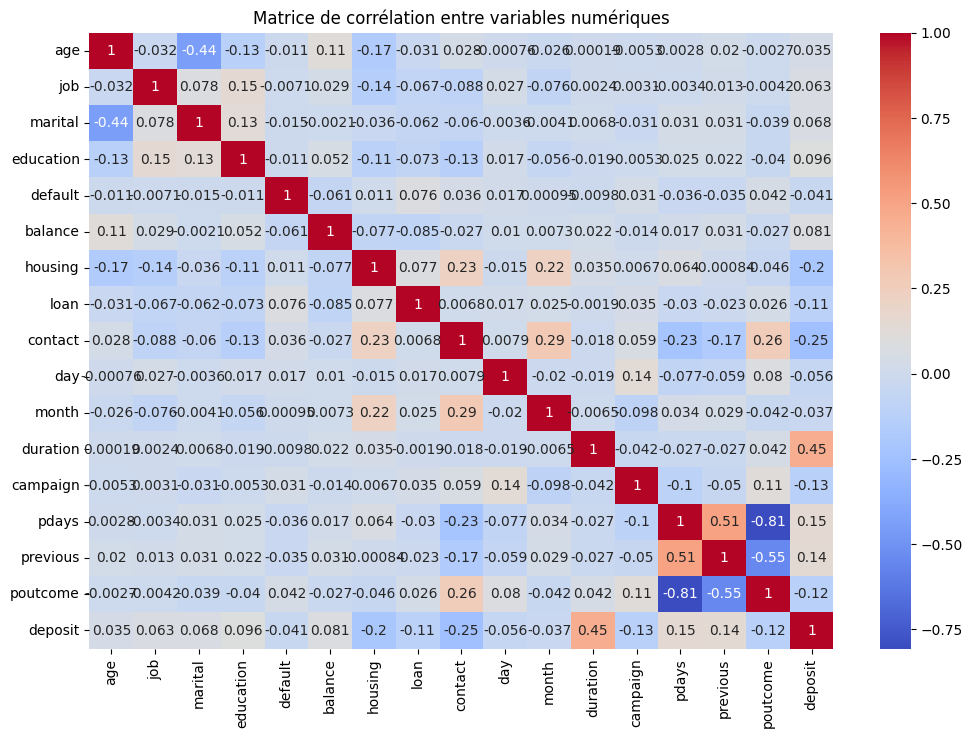

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

# 📈 Étape 6 : Modélisation

#### Séparation des variables explicatives (X) et de la variable cible (y)

In [21]:
X = df.drop('deposit', axis=1)
y = df['deposit']

##### Découpage en données d'entraînement et de test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Entraînement d'un modèle Random Forest

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ Étape 7 : Évaluation du modèle

# Affichage de l'accuracy et du rapport de classification

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8334079713390058


 L'accuracy (précision globale) est d'environ 83.3%, ce qui montre que le modèle est fiable dans la majorité des cas.

In [26]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



 Classe 0 (clients ayant refusé l'offre) :
- Précision : 86% → sur tous les clients prédits comme ayant refusé, 86% ont effectivement refusé
- Rappel : 82% → sur tous les clients ayant réellement refusé, 82% ont été correctement identifiés
# 
Classe 1 (clients ayant accepté l'offre) :
- Précision : 81% → 81% des clients prédits comme intéressés ont réellement souscrit
- Rappel : 85% → le modèle a capturé 85% des souscriptions réelles